In [1]:
from pathlib import Path
import torch
from torch import nn, optim
from torch.nn import functional as F
from mltools import ld, models, MachineLearning

In [ ]:
train_iter, val_iter, test_iter, vocab = ld.chn_senti_corp('../data/ChnSentiCorp_htl_all.csv')  # 加载词表，数据集
rnn_layer = nn.LSTM(len(vocab), hidden_size=512, batch_first=True, bidirectional=True)  # 定义循环网络LSTM
model = models.RNNModel(lambda x: F.one_hot(x, len(vocab)), rnn_layer, step_size=200, output_size=2)  # 定义训练模型
device = torch.device('cuda')


class LSTMCSCMachineLearning(MachineLearning):
    def calculate_model(self, x):
        '''计算神经网络'''
        y, _ = self.model(x)
        return y

    def grad_update(self, loss):
        '''梯度更新'''
        self.optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1, norm_type=2)
        self.optimizer.step()

    def show_pred(self, contents, preds, reals):
        for content, pred, real in zip(contents, preds, reals):
            print(f'预测值 {pred}, 真实值 {real}, 数据 {''.join(vocab[content.tolist()]).replace('<pad>', ' ')}')


ml = LSTMCSCMachineLearning(model, train_iter, val_iter, test_iter, device=device)
model_path = '../model/LSTM_CSC.pth'

train loss 0.561, val loss 0.580, val acc 0.680
37.0 sec/epoch on cuda


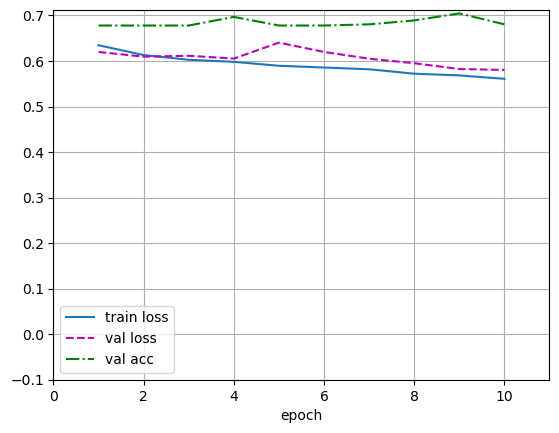

In [ ]:
ml.set_loss(nn.CrossEntropyLoss())
ml.set_optimizer(optim.SGD(model.parameters(), lr=1e-1))
if True:
    ml.train(num_epochs=10)  # 训练
    if False:
        torch.save(model.state_dict(), model_path)
elif Path(model_path).exists():
    model.load_state_dict(torch.load(model_path, map_location=device))

In [4]:
ml.test()  # 测试

Accuracy rate 0.6972555746140652


In [5]:
ml.predict()  # 预测

预测值 1, 真实值 0, 数据 此酒店位置太偏，附近没有商业网点，很不方便。房间的墙壁，厕所有点不干净。虽有早餐，但早上7点前不提供。我因要赶早班车，需7点前离店，只能去吃他们付费餐厅的早餐。很奇怪，同样的厨房，付费的就有，附送的早餐就没有。<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
预测值 1, 真实值 1, 数据 总的来说不错,但是茶楼不怎么样!行政间台士电脑还可以,上网速度超快.<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><